In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_Boston = pd.read_csv('BostonData2021.csv')

In [3]:
df_Boston.shape

(177091, 66)

In [4]:
#df_Boston = df_Boston[df_Boston.LU.isin(['A','C','CC','CD','E','EA','RC'])]

In [5]:
df_Boston.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,HEAT_FUEL,AC_TYPE,FIRE_PLACE,PlUMBING,NUM_PARKING,PROP_VIEW,CORNER_UNIT,TOTALBATH,BED_BATH,Heat
0,100001000,NaN,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1.0,...,NaN,N - None,NaN,NaN,3.0,A - Average,NaN,3.0,6-Bed 3-Bath,Yes
1,100002000,NaN,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,NaN,C - Central AC,NaN,NaN,NaN,A - Average,NaN,3.0,3-Bed 3-Bath,Yes
2,100003000,NaN,100003000.0,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,NaN,N - None,NaN,NaN,NaN,A - Average,NaN,3.0,5-Bed 3-Bath,Yes
3,100004000,NaN,100004000.0,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,NaN,N - None,NaN,NaN,NaN,A - Average,NaN,3.0,5-Bed 3-Bath,Yes
4,100005000,NaN,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,...,NaN,N - None,NaN,NaN,NaN,A - Average,NaN,3.0,6-Bed 3-Bath,Yes


In [6]:
cities = list(df_Boston['CITY'].unique())
print(cities)

['EAST BOSTON', 'BOSTON', 'JAMAICA PLAIN', 'CHARLESTOWN', 'ROXBURY', 'SOUTH BOSTON', 'ROXBURY CROSSIN', 'DORCHESTER', 'ROSLINDALE', 'MATTAPAN', 'HYDE PARK', 'READVILLE', 'BRIGHTON', 'WEST ROXBURY', 'CHESTNUT HILL', 'DEDHAM', 'ALLSTON', 'BROOKLINE']


In [7]:
zipcodes = list(df_Boston['ZIPCODE'].unique())
print(zipcodes)

[2128, 2115, 2130, 2129, 2119, 2114, 2113, 2109, 2108, 2110, 2201, 2210, 2116, 2111, 2127, 2118, 2199, 2215, 2120, 2133, 2125, 2122, 2124, 2131, 2121, 2126, 2136, 2132, 2137, 2135, 2467, 2026, 2134, 2446, 2445]


In [8]:
univ_codes = [2115, 2215, 2116, 2108, 2125]

In [9]:
univ_codes

[2115, 2215, 2116, 2108, 2125]

In [10]:
df_Boston.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY',
       'ZIPCODE', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE',
       'OWN_OCC', 'OWNER', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_CITY',
       'MAIL_STATE', 'MAIL_ZIPCODE', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS',
       'COM_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE',
       'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL',
       'EXT_FINISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHEN', 'TT_RMS', 'BDRM_COND', 'BTHRM_STYLE1',
       'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1',
       'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE',
       'FIRE_PLACE', 'PlUMBING', 'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT',
       'TOTALBATH', 'BED_BATH', 'Heat'],
      dtype='object')

In [11]:
df_Boston['LAND_VALUE'] = df_Boston['LAND_VALUE']/1000

In [12]:
df_Boston['BLDG_VALUE'] = df_Boston['BLDG_VALUE']/1000

In [13]:
df_Boston['TOTAL_VALUE'] = df_Boston['TOTAL_VALUE']/1000

In [14]:
max(df_Boston['TOTAL_VALUE'])

1846600.0

In [15]:
#Total value 10k to 5 million
df_Boston = df_Boston[(df_Boston['TOTAL_VALUE'] > 10) & (df_Boston['TOTAL_VALUE'] < 8000)]
df_Boston = df_Boston[(df_Boston['LAND_SF'] < 700000)]

In [16]:
df_Boston['LOCATION_TYPE'] = df_Boston['ZIPCODE'].apply(lambda x: 'University' if x in univ_codes else 'Non-university')

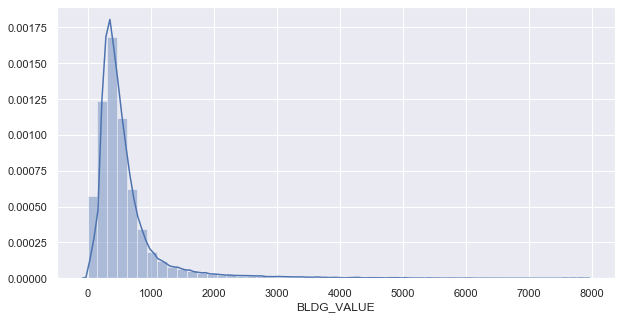

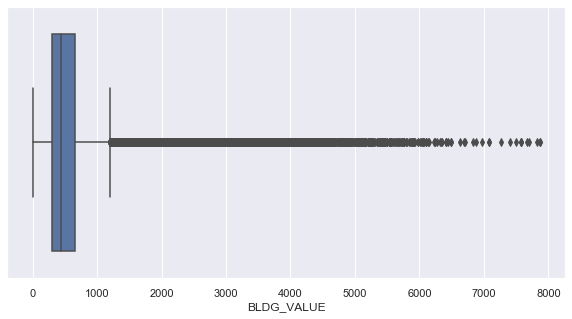

In [17]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df_Boston['BLDG_VALUE'])
plt.show()
sns.boxplot(df_Boston['BLDG_VALUE'])
plt.show()

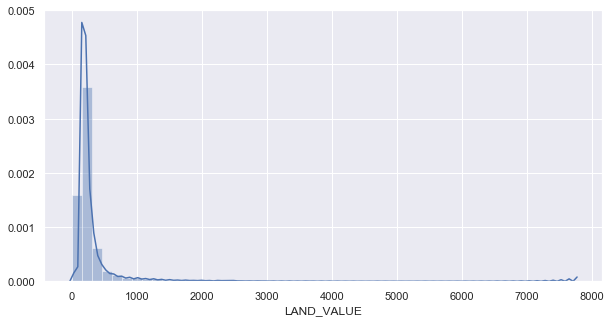

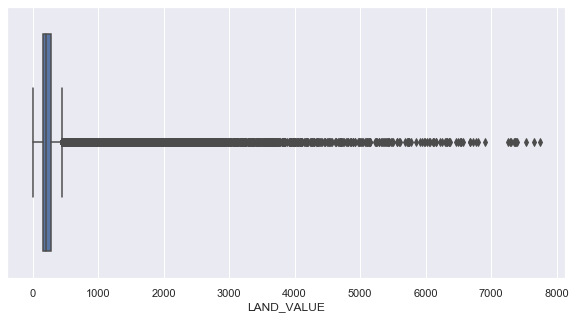

In [18]:
sns.distplot(df_Boston['LAND_VALUE'])
plt.show()
sns.boxplot(df_Boston['LAND_VALUE'])
plt.show()

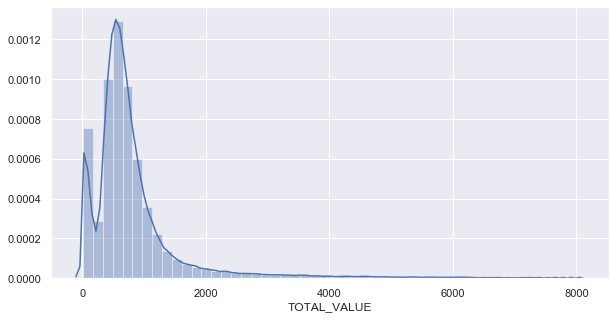

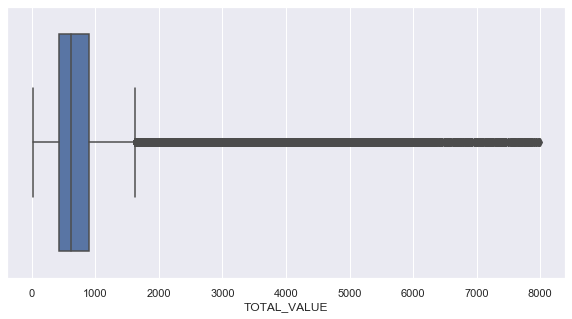

In [19]:
sns.distplot(df_Boston['TOTAL_VALUE'])
plt.show()
sns.boxplot(df_Boston['TOTAL_VALUE'])
plt.show()

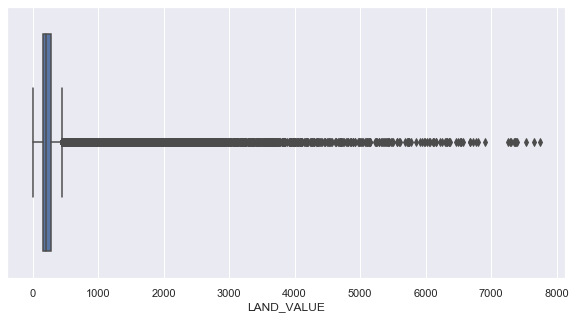

In [20]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(df_Boston['LAND_VALUE']);

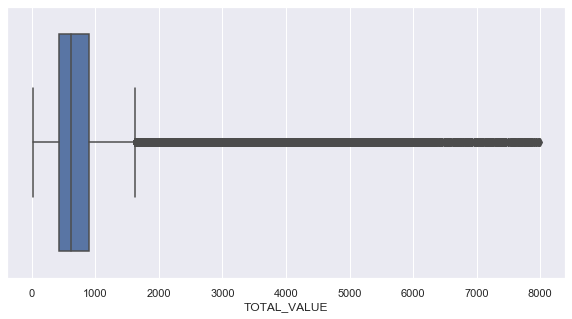

In [21]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(df_Boston['TOTAL_VALUE']);

In [22]:
type(df_Boston['LOCATION_TYPE'])

pandas.core.series.Series

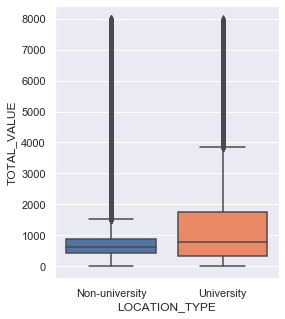

In [63]:
sns.set(rc = {'figure.figsize':(4,5)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
sns.boxplot(y=df_Boston['TOTAL_VALUE'], x=df_Boston['LOCATION_TYPE']);

In [24]:
bins = [0, 1000, 2000, 3000,4000,5000,6000, 7000,1000000]
df_Boston['LAND_AREA_GRP'] = pd.cut(df_Boston.LAND_SF, bins)

In [25]:
df_Boston.loc[df_Boston['BED_RMS']<=5, 'BED_RMS_GRP'] = '1-5'
df_Boston.loc[(df_Boston['BED_RMS']<=11) & (df_Boston['BED_RMS']>5), 'BED_RMS_GRP'] = '6-11'
df_Boston.loc[(df_Boston['BED_RMS']<=16) & (df_Boston['BED_RMS']>11), 'BED_RMS_GRP'] = '12-16'

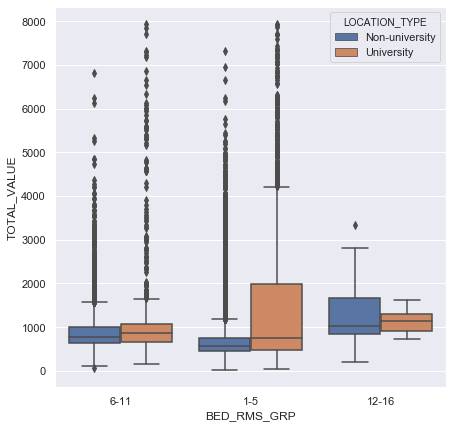

In [26]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.boxplot(y=df_Boston['TOTAL_VALUE'], x=df_Boston['BED_RMS_GRP'], hue = df_Boston['LOCATION_TYPE']);

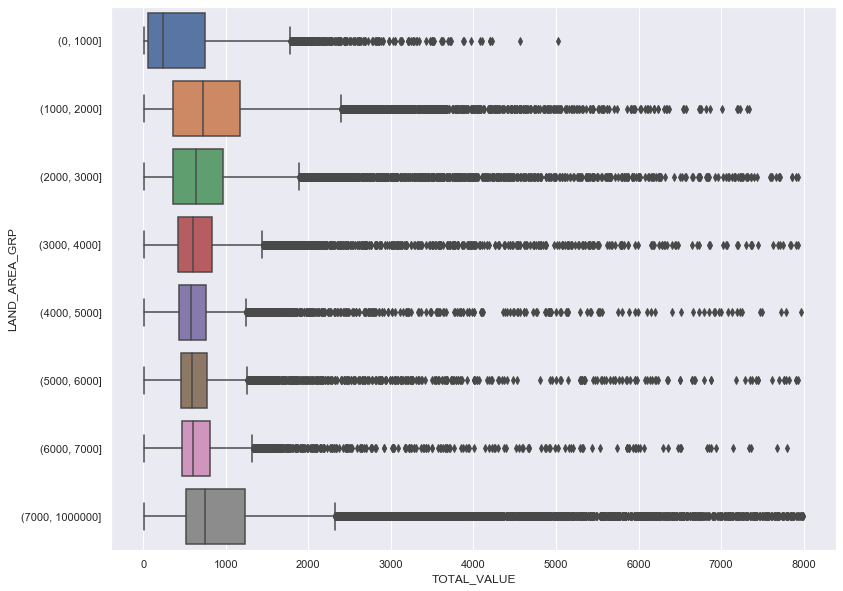

In [27]:
sns.set(rc = {'figure.figsize':(13,10)})
sns.boxplot(x=df_Boston['TOTAL_VALUE'], y=df_Boston['LAND_AREA_GRP']);

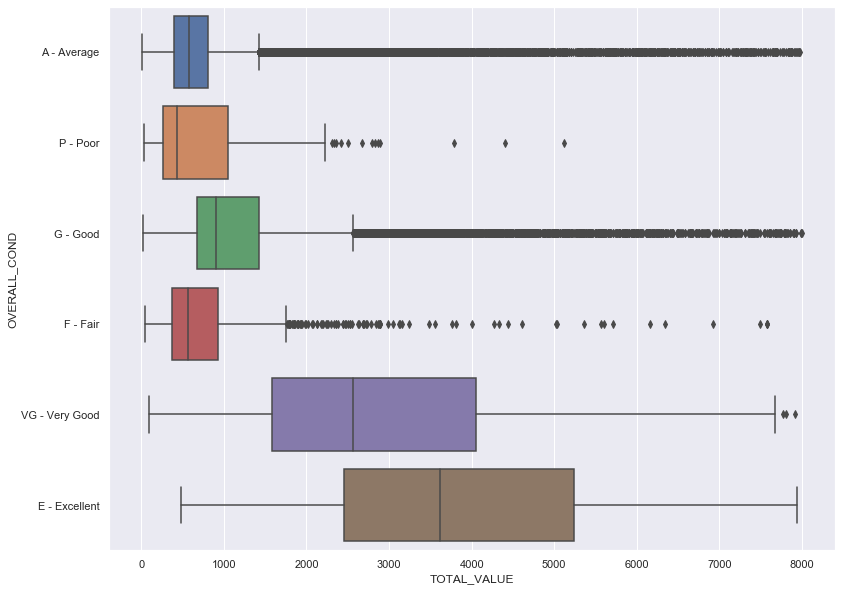

In [28]:
sns.boxplot(x=df_Boston['TOTAL_VALUE'], y=df_Boston['OVERALL_COND']);

In [29]:
df_Boston['ZIPCODE'] = df_Boston.ZIPCODE.astype(str)

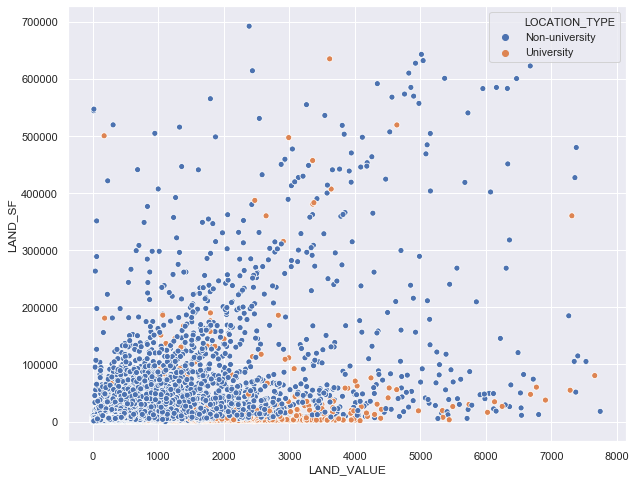

In [30]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(y=df_Boston['LAND_SF'], x=df_Boston['LAND_VALUE'],hue=df_Boston['LOCATION_TYPE'])
plt.show()

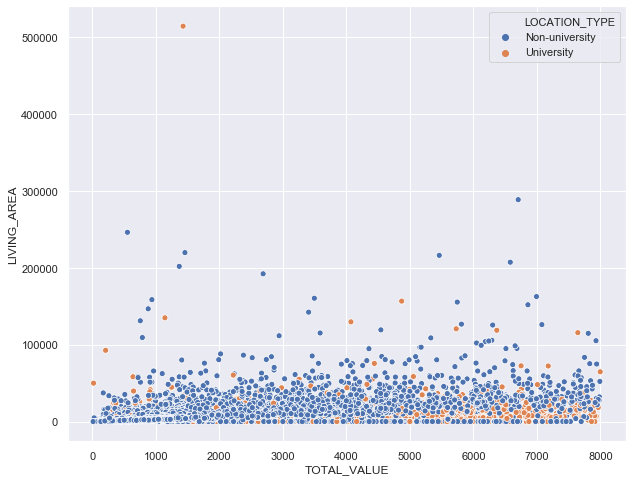

In [31]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(y=df_Boston['LIVING_AREA'], x=df_Boston['TOTAL_VALUE'],hue=df_Boston['LOCATION_TYPE'])
plt.show()

In [32]:
df_Boston.loc[df_Boston['LIVING_AREA']<=1500, 'LIVING_AREA_GRP'] = '0-1500'
df_Boston.loc[(df_Boston['LIVING_AREA']<=3000) & (df_Boston['LIVING_AREA']>1500), 'LIVING_AREA_GRP'] = '1500-3000'
df_Boston.loc[(df_Boston['LIVING_AREA']<=4500) & (df_Boston['LIVING_AREA']>3000), 'LIVING_AREA_GRP'] = '3000-4500'
df_Boston.loc[(df_Boston['LIVING_AREA']<=6000) & (df_Boston['LIVING_AREA']>4500), 'LIVING_AREA_GRP'] = '4500-6000'
df_Boston.loc[(df_Boston['LIVING_AREA']<=10000) & (df_Boston['LIVING_AREA']>6000), 'LIVING_AREA_GRP'] = '6k-10k'
df_Boston.loc[(df_Boston['LIVING_AREA']<=10000) & (df_Boston['LIVING_AREA']>600000), 'LIVING_AREA_GRP'] = '10k+'

In [34]:
df_Boston['VALUE_PER_BEDRM'] = df_Boston['TOTAL_VALUE']/ df_Boston['BED_RMS'] 

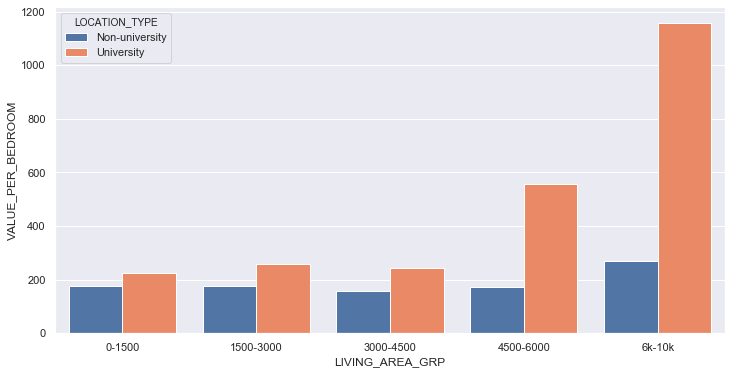

In [65]:
sns.set(rc = {'figure.figsize':(12,6)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df = df_Boston.groupby(['LIVING_AREA_GRP', 'LOCATION_TYPE']).agg(VALUE_PER_BEDROOM=("VALUE_PER_BEDRM", 'mean'))
df = df.reset_index()
sns.barplot(x=df['LIVING_AREA_GRP'], y=df['VALUE_PER_BEDROOM'], hue=df['LOCATION_TYPE']);

In [36]:
df = df_Boston.groupby(['INT_COND', 'LOCATION_TYPE']).agg(VALUE_PER_BEDROOM=("VALUE_PER_BEDRM", 'mean'))
df = df.reset_index()

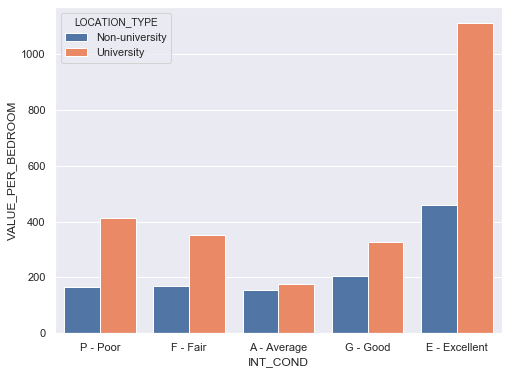

In [37]:
sns.barplot(x=df['INT_COND'], y=df['VALUE_PER_BEDROOM'], hue=df['LOCATION_TYPE'], order = ['P - Poor','F - Fair','A - Average', 'G - Good', 'E - Excellent']);
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))

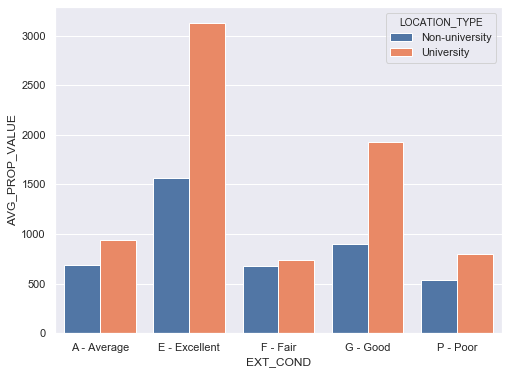

In [38]:
df = df_Boston.groupby(['EXT_COND', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['EXT_COND'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE']);

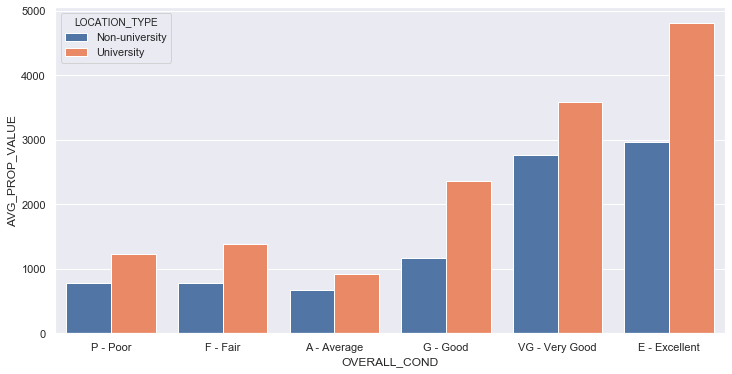

In [66]:
sns.set(rc = {'figure.figsize':(12,6)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df = df_Boston.groupby(['OVERALL_COND', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['OVERALL_COND'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE'], order = ['P - Poor','F - Fair','A - Average', 'G - Good', 'VG - Very Good','E - Excellent']);

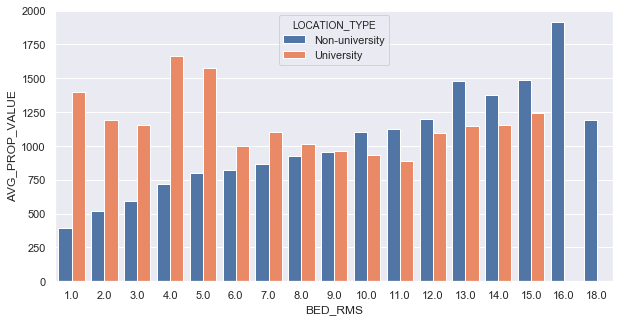

In [40]:
sns.set(rc = {'figure.figsize':(10,5)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df = df_Boston.groupby(['BED_RMS', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['BED_RMS'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE']);

#check separately for Univ zip codes

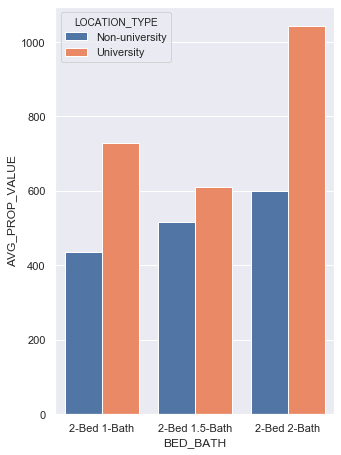

In [41]:
sns.set(rc = {'figure.figsize':(5,7.5)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df_1 = df_Boston[(df_Boston['BED_RMS']==2) & (df_Boston['TOTALBATH']<=2) & (df_Boston['TOTALBATH']>0)]
df = df_1.groupby(['BED_BATH', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['BED_BATH'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE']);


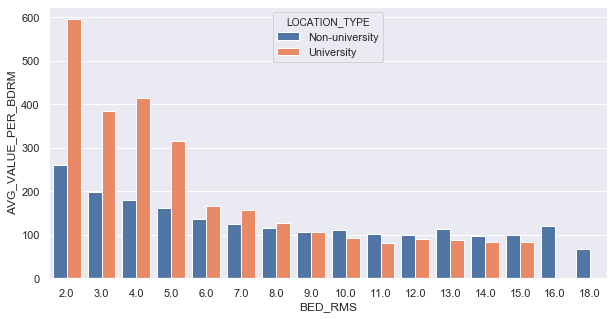

In [42]:
sns.set(rc = {'figure.figsize':(10,5)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df_1 = df_Boston[(df_Boston['BED_RMS']>=2)]
df = df_1.groupby(['BED_RMS', 'LOCATION_TYPE']).agg(AVG_VALUE_PER_BDRM=('VALUE_PER_BEDRM', 'mean'))
df = df.reset_index()
sns.barplot(x=df['BED_RMS'], y=df['AVG_VALUE_PER_BDRM'], hue=df['LOCATION_TYPE']);

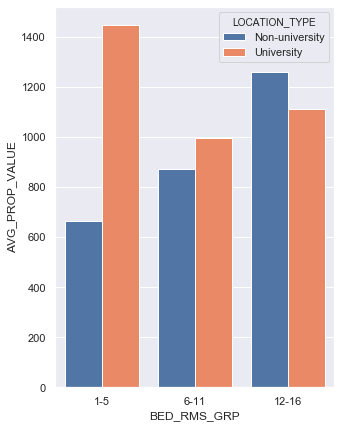

In [45]:
sns.set(rc = {'figure.figsize':(5,7)})
colors = ["#4374B3", "coral"]
sns.set_palette(sns.color_palette(colors))
df_bed_grp = df_Boston.groupby(['BED_RMS_GRP', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df_bed_grp = df_bed_grp.reset_index()
sns.barplot(x=df_bed_grp['BED_RMS_GRP'], y=df_bed_grp['AVG_PROP_VALUE'], hue=df_bed_grp['LOCATION_TYPE'], order=['1-5','6-11','12-16']);

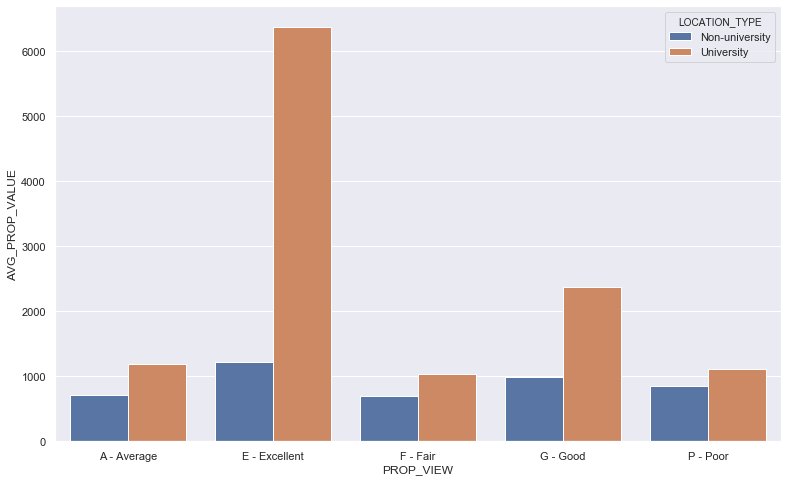

In [44]:
sns.set(rc = {'figure.figsize':(13,8)})
df = df_Boston.groupby(['PROP_VIEW', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['PROP_VIEW'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE']);

In [46]:
df_Boston['LAND_AREA_GRP'].value_counts()

(7000, 1000000]    15306
(4000, 5000]       14978
(3000, 4000]       14245
(1000, 2000]       11577
(2000, 3000]       10931
(5000, 6000]       10640
(6000, 7000]        6475
(0, 1000]           5092
Name: LAND_AREA_GRP, dtype: int64

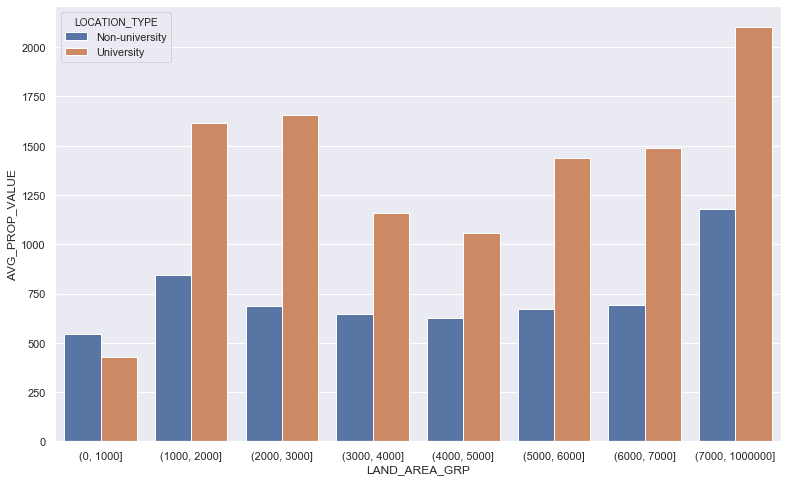

In [47]:
sns.set(rc = {'figure.figsize':(13,8)})
df = df_Boston.groupby(['LAND_AREA_GRP', 'LOCATION_TYPE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['LAND_AREA_GRP'], y=df['AVG_PROP_VALUE'], hue=df['LOCATION_TYPE']);

In [48]:
df_Boston['LAND_SF'].min()

0.0

In [49]:
import numpy as np

Univ_values = df_Boston[df_Boston['LOCATION_TYPE']=='University']['TOTAL_VALUE']
Non_univ_values = df_Boston[df_Boston['LOCATION_TYPE']=='Non-university']['TOTAL_VALUE']

Univ_mean = np.mean(Univ_values)
Non_univ_mean = np.mean(Non_univ_values)
print("Univ mean value:",Univ_mean)
print("Non-Univ mean value:",Non_univ_mean)
Univ_std = np.std(Univ_values)
Non_univ_std = np.std(Non_univ_values)
print("Univ std value:",Univ_std)
print("Non-univ std value:",Non_univ_std)

Univ mean value: 1354.683377391688
Non-Univ mean value: 770.6133760181625
Univ std value: 1564.339152080093
Non-univ std value: 775.0263630639652


In [50]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(Univ_values, x2 = Non_univ_values, value=0, alternative='two-sided')
print("z statistic",ztest)
print("p-value",float(pval))

z statistic 59.43276764093346
p-value 0.0


In [ ]:
bed_6_11_values = df_Boston[df_Boston['BED_RMS_GRP']=='6-11']['TOTAL_VALUE']
bed_1_5_values = df_Boston[df_Boston['BED_RMS_GRP']=='1-5']['TOTAL_VALUE']
bed_12_16_values = df_Boston[df_Boston['BED_RMS_GRP']=='12-16']['TOTAL_VALUE']

ztest ,pval = stests.ztest(bed_1_5_values, x2 = bed_6_11_values, value=0, alternative='two-sided')
print("z statistic",ztest)
print("p-value",float(pval))

In [ ]:
ztest ,pval = stests.ztest(bed_12_16_values, x2 = bed_6_11_values, value=0, alternative='two-sided')
print("z statistic",ztest)
print("p-value",float(pval))

In [ ]:
df_Boston['PROPERTY_AGE'] = 2021-df_Boston['YR_BUILT']

In [ ]:
df_Boston['REMODEL_TIME'] = 2021-df_Boston['YR_REMODEL']

In [ ]:
df_Boston_new = df_Boston[(df_Boston['PROPERTY_AGE']<20)]

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
df = df_Boston_new.groupby(['PROPERTY_AGE']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['PROPERTY_AGE'], y=df['AVG_PROP_VALUE']);

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
df = df_Boston_new.groupby(['REMODEL_TIME']).agg(AVG_PROP_VALUE=("TOTAL_VALUE", 'mean'))
df = df.reset_index()
sns.barplot(x=df['REMODEL_TIME'], y=df['AVG_PROP_VALUE']);